In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

In [ ]:
penguins = sb.load_dataset('penguins')

In [ ]:
# a random permutation
p = np.random.permutation(len(penguins))[:10]
penguins.take(p)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,Male
313,Gentoo,Biscoe,49.5,16.1,224.0,5650.0,Male
306,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,Female
127,Adelie,Torgersen,41.5,18.3,195.0,4300.0,Male
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
284,Gentoo,Biscoe,45.8,14.2,219.0,4700.0,Female
322,Gentoo,Biscoe,47.2,15.5,215.0,4975.0,Female
68,Adelie,Torgersen,35.9,16.6,190.0,3050.0,Female
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,Male


In [ ]:
# lucky for us, it's low
penguins.isnull().sum().sum()

np.int64(19)

In [ ]:
pd.crosstab(penguins.species, [penguins.sex, penguins.island])

sex       Female                   Male                
island    Biscoe Dream Torgersen Biscoe Dream Torgersen
species                                                
Adelie        22    27        24     22    28        23
Chinstrap      0    34         0      0    34         0
Gentoo        58     0         0     61     0         0

In [ ]:
nCols = penguins.columns.difference(['species','island','sex']).to_list()

In [ ]:
penguins.columns.difference(['species','island','sex'])

Index(['bill_depth_mm', 'bill_length_mm', 'body_mass_g', 'flipper_length_mm'], dtype='object')

In [ ]:
penguins[ penguins.columns.difference(['species','island','sex']) ]

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
0,18.7,39.1,3750.0,181.0
1,17.4,39.5,3800.0,186.0
2,18.0,40.3,3250.0,195.0
3,NaN,NaN,NaN,NaN
4,19.3,36.7,3450.0,193.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,14.3,46.8,4850.0,215.0
341,15.7,50.4,5750.0,222.0
342,14.8,45.2,5200.0,212.0


<Axes: >

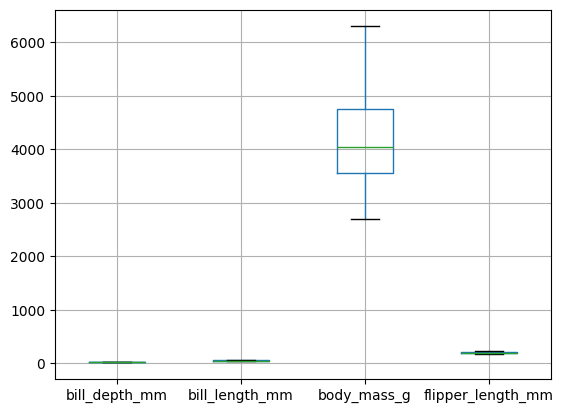

In [ ]:
penguins.boxplot(column=penguins.columns.difference(['species','island','sex']).to_list())

In [ ]:
summary = penguins.describe()

In [ ]:
summary.index, summary.columns

(Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object'),
 Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object'))

In [ ]:
penguinsNorm = penguins[ penguins.columns.difference(['species','island','sex']) ]

In [ ]:
for c in penguinsNorm.columns:
  penguinsNorm.loc[:, c] = (penguinsNorm[c] - summary[c]['mean']) / summary[c]['std']

<Axes: >

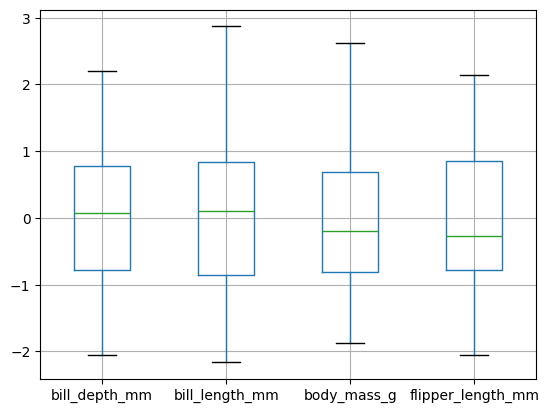

In [ ]:
penguinsNorm.boxplot()

In [ ]:
corr = penguins[ penguins.columns.difference(['species','island','sex']) ].corr()

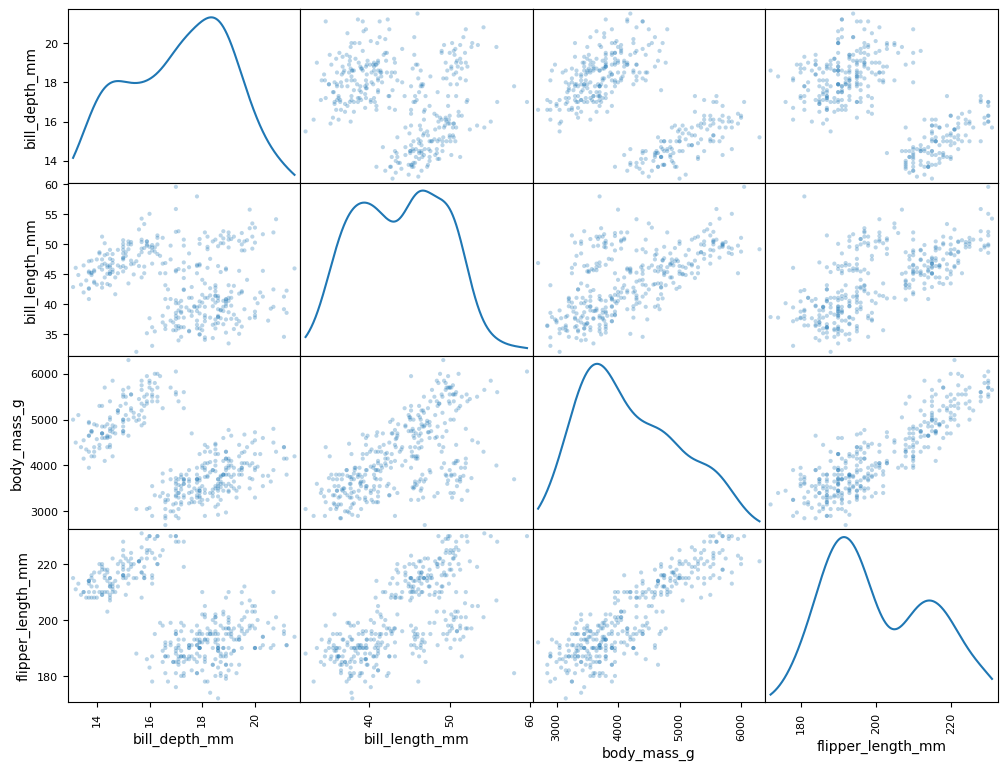

In [ ]:
_ = pd.plotting.scatter_matrix(penguins[penguins.columns.difference(['species','island','sex'])], diagonal='kde', alpha=0.3, figsize=(12,9))

In [ ]:
import matplotlib.pyplot as plot
import matplotlib.patches as mpatches

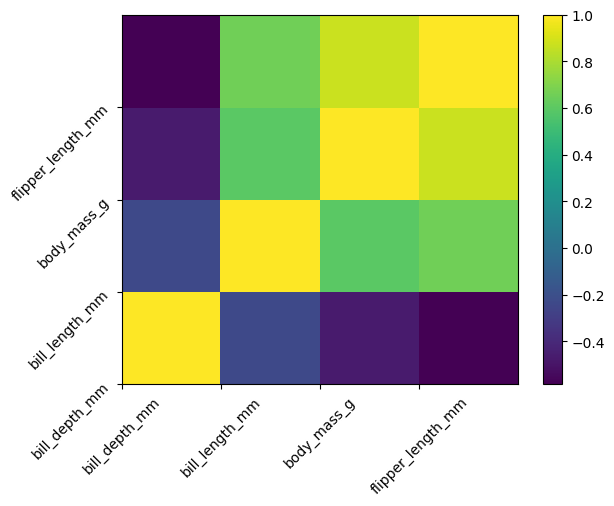

In [ ]:
# https://www.geeksforgeeks.org/customizing-heatmap-colors-with-matplotlib/
# default colormap is viridis
_ = plot.pcolor(corr)
_ = plot.colorbar()
_ = plot.xticks(range(len(nCols)), nCols, rotation=45)
_ = plot.yticks(range(len(nCols)), nCols, rotation=45)

In [ ]:
# linear correlation between bill_length_mm and flipper_length_mm,
#                            body_mass_g and flipper_length_mm,
#                            body_mass_g and bill_length_mm

In [ ]:
import pylab
import scipy.stats as stats

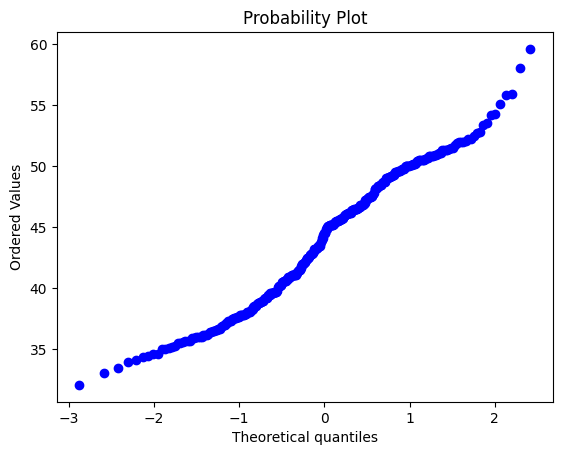

In [ ]:
# bill_length_mm seems to have more outliers
_ = stats.probplot(penguins.bill_length_mm, dist="norm", plot=pylab)

In [ ]:
# even then, it's not far off from the line

In [ ]:
nCols

['bill_depth_mm', 'bill_length_mm', 'body_mass_g', 'flipper_length_mm']

In [ ]:
import itertools

In [ ]:
list( itertools.combinations([0,1,2], 2) )

[(0, 1), (0, 2), (1, 2)]

In [ ]:
# itertools.permutations is also interesting
for i,j in itertools.combinations(nCols, 2):
  print("{} vs {}".format(i,j))

bill_depth_mm vs bill_length_mm
bill_depth_mm vs body_mass_g
bill_depth_mm vs flipper_length_mm
bill_length_mm vs body_mass_g
bill_length_mm vs flipper_length_mm
body_mass_g vs flipper_length_mm


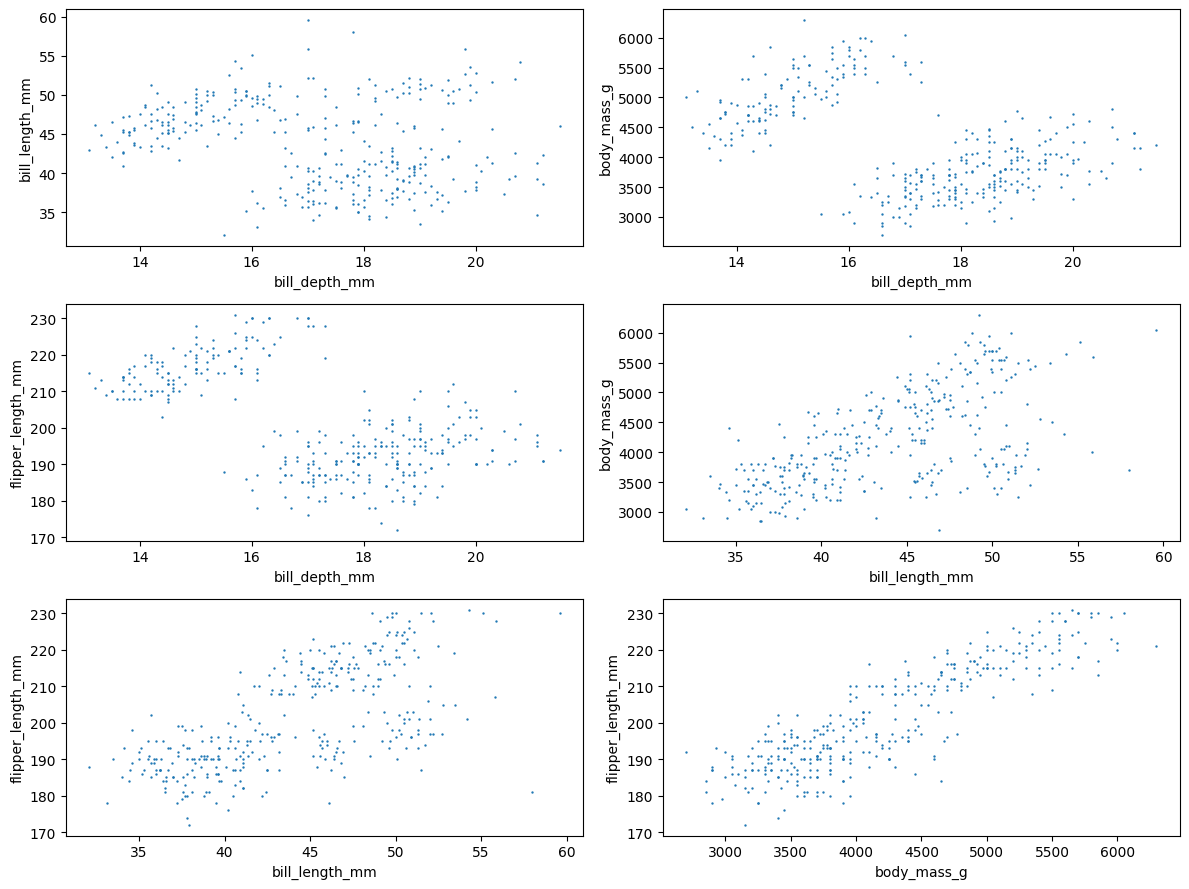

In [ ]:
# TODO: color the points by island and species
fig, axs = plot.subplots(ncols=2, nrows=3);
fig.set_size_inches(12, 9)
axs = fig.get_axes()
a = 0
for i,j in itertools.combinations(nCols, 2):
  axs[a].scatter(penguins[i], penguins[j], s=0.5)
  axs[a].set_xlabel(i)
  axs[a].set_ylabel(j)
  a += 1
plot.tight_layout()

In [ ]:
cmap = {}
for i,j in zip(penguins.species.unique(), ['blue','yellow','green']):
  cmap[i] = j
cmap

{'Adelie': 'blue', 'Chinstrap': 'yellow', 'Gentoo': 'green'}

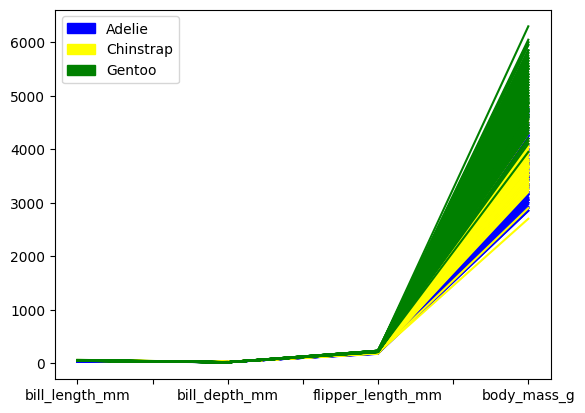

In [ ]:
for i in range(len(penguins[nCols])):
  dr = penguins.iloc[i, 2:6]
  dr.plot(color=cmap[penguins.loc[i, 'species']])
legendpatches = [ mpatches.Patch(color=c, label="{:s}".format(s) ) for s,c in cmap.items() ]
plot.legend(handles=legendpatches)

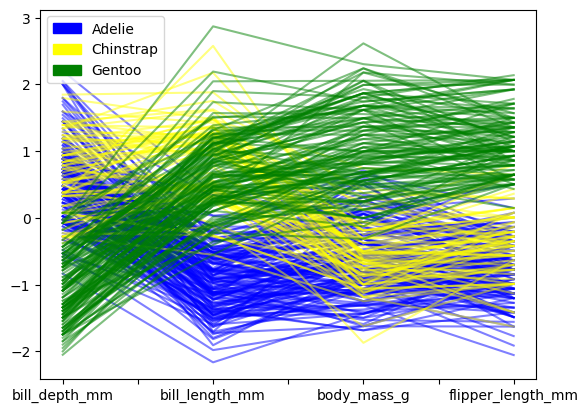

In [ ]:
for i in range(len(penguins[nCols])):
  dr = penguinsNorm.iloc[i, :]
  dr.plot(color=cmap[penguins.loc[i, 'species']], alpha=0.5)
legendpatches = [ mpatches.Patch(color=c, label="{:s}".format(s) ) for s,c in cmap.items() ]
plot.legend(handles=legendpatches)

In [ ]:
# bill_depth_mm vs body_mass_g
# bill_depth_mm vs flipper_length_mm

In [ ]:
split = {}
split['bill_depth_mm'] = {'all': pd.cut(penguins['bill_depth_mm'].values, 4)}
split['body_mass_g'] = {'all': pd.cut(penguins['body_mass_g'].values, 4)}
split['flipper_length_mm'] = {'all': pd.cut(penguins['flipper_length_mm'].values, 4)}

for k in split.keys():
  for p in penguins.species.unique():
    split[k][p] = pd.cut( penguins[penguins.species == p][k].values, split[k]['all'].categories.to_list() )

In [ ]:
split['bill_depth_mm']['all'].categories.to_list()

[Interval(13.092, 15.2, closed='right'),
 Interval(15.2, 17.3, closed='right'),
 Interval(17.3, 19.4, closed='right'),
 Interval(19.4, 21.5, closed='right')]

In [ ]:
counts = {}
for k in split.keys():
  counts[k] = {}
  for p in penguins.species.unique():
    counts[k][p] = split[k][p].value_counts()

In [ ]:
for k in counts.keys():
  pd.DataFrame(counts[k])

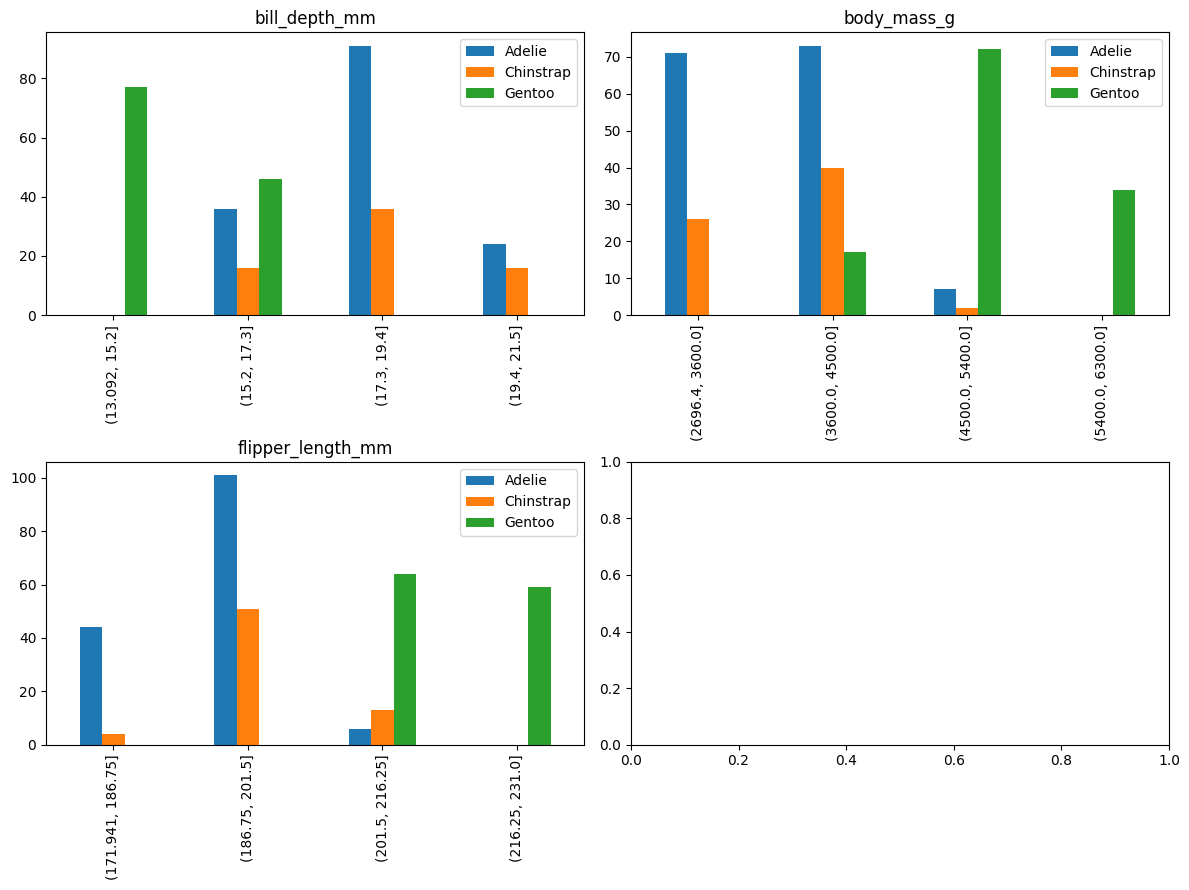

In [ ]:
fig, axes = plot.subplots(ncols=2, nrows=2)
fig.set_size_inches(12, 9)
for i, k in enumerate(counts.keys()):
  row = int(i / 2)
  col = i % 2
  pd.DataFrame(counts[k]).plot(kind='bar', ax=axes[row, col])
  axes[row, col].set_title(k)
fig.tight_layout()